# Plot WRF output variables

### Import libraries

In [4]:
import numpy as np, pandas as pd, datetime, xarray as xr
import netCDF4
import time
import matplotlib.pyplot as plt
from matplotlib import cm


### Read WRF output file

In [6]:
abc = xr.open_dataset("wrfout_d02_2018-01-26_00_00_00")

In [7]:
abc

<xarray.Dataset> Size: 3GB
Dimensions:               (Time: 24, south_north: 100, west_east: 100,
                           bottom_top: 49, bottom_top_stag: 50,
                           soil_layers_stag: 4, west_east_stag: 101,
                           south_north_stag: 101, emissions_zdim: 1,
                           bio_emissions_dimension_stag: 400, klevs_for_dvel: 1)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 960kB ...
    XLONG                 (Time, south_north, west_east) float32 960kB ...
    XTIME                 (Time) datetime64[ns] 192B ...
    XLAT_U                (Time, south_north, west_east_stag) float32 970kB ...
    XLONG_U               (Time, south_north, west_east_stag) float32 970kB ...
    XLAT_V                (Time, south_north_stag, west_east) float32 970kB ...
    XLONG_V               (Time, south_north_stag, west_east) float32 970kB ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                emissions_zdim, bio_emissions_dimension_stag,
                                klevs_for_dvel
Data variables: (12/208)
    Times                 (Time) |S19 456B ...
    LU_INDEX              (Time, south_north, west_east) float32 960kB ...
    ZNU                   (Time, bottom_top) float32 5kB ...
    ZNW                   (Time, bottom_top_stag) float32 5kB ...
    ZS                    (Time, soil_layers_stag) float32 384B ...
    DZS                   (Time, soil_layers_stag) float32 384B ...
    ...                    ...
    benzene               (Time, bottom_top, south_north, west_east) float32 47MB ...
    xyl                   (Time, bottom_top, south_north, west_east) float32 47MB ...
    hono                  (Time, bottom_top, south_north, west_east) float32 47MB ...
    LANDMASK              (Time, south_north, west_east) float32 960kB ...
    SST                   (Time, south_north, west_east) float32 960kB ...
    SST_INPUT             (Time, south_north, west_east) float32 960kB ...
Attributes: (12/125)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2018-01-16_00:00:00
    SIMULATION_START_DATE:           2017-12-17_00:00:00
    WEST-EAST_GRID_DIMENSION:        101
    SOUTH-NORTH_GRID_DIMENSION:      101
    BOTTOM-TOP_GRID_DIMENSION:       50
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      -1
    ETAC:                            0.0

In [6]:
latitude = abc.XLAT

In [11]:
latitude

<xarray.DataArray 'XLAT' (Time: 24, south_north: 100, west_east: 100)> Size: 960kB
[240000 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 960kB ...
    XLONG    (Time, south_north, west_east) float32 960kB ...
    XTIME    (Time) datetime64[ns] 192B ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:

In [12]:
latitude[0, :, 0].values

array([16.30182 , 16.347351, 16.39286 , 16.438356, 16.483852, 16.529335,
       16.574802, 16.620258, 16.665712, 16.711147, 16.756575, 16.801989,
       16.847395, 16.89279 , 16.93817 , 16.983541, 17.028908, 17.074253,
       17.1196  , 17.164917, 17.210236, 17.255547, 17.300838, 17.34613 ,
       17.3914  , 17.436657, 17.481907, 17.52715 , 17.572372, 17.617588,
       17.662798, 17.707987, 17.753174, 17.798342, 17.843504, 17.88865 ,
       17.933784, 17.978912, 18.024025, 18.069126, 18.114218, 18.159298,
       18.204363, 18.249422, 18.294468, 18.33949 , 18.384516, 18.42952 ,
       18.474518, 18.519508, 18.564478, 18.609442, 18.65439 , 18.699326,
       18.74425 , 18.789164, 18.834066, 18.878954, 18.923834, 18.968702,
       19.013556, 19.058395, 19.103222, 19.148043, 19.192848, 19.23764 ,
       19.28242 , 19.327185, 19.371943, 19.416687, 19.461418, 19.506136,
       19.550846, 19.595543, 19.640219, 19.684889, 19.729544, 19.774193,
       19.81882 , 19.863451, 19.90805 , 19.952646, 

In [7]:
longitude = abc.XLONG

In [15]:
longitude[0, 0, :].values

array([71.45595 , 71.50338 , 71.55082 , 71.59825 , 71.64568 , 71.69312 ,
       71.740555, 71.787994, 71.83543 , 71.882866, 71.9303  , 71.97774 ,
       72.02517 , 72.07261 , 72.12004 , 72.16748 , 72.21491 , 72.262344,
       72.309784, 72.357216, 72.404655, 72.45209 , 72.49953 , 72.54696 ,
       72.5944  , 72.64183 , 72.68927 , 72.7367  , 72.78414 , 72.83157 ,
       72.879005, 72.926445, 72.97388 , 73.02132 , 73.06875 , 73.11619 ,
       73.16362 , 73.21106 , 73.25849 , 73.30593 , 73.35336 , 73.4008  ,
       73.448235, 73.49567 , 73.543106, 73.59054 , 73.63798 , 73.68541 ,
       73.73285 , 73.78028 , 73.82772 , 73.87515 , 73.92259 , 73.970024,
       74.01746 , 74.064896, 74.112335, 74.15977 , 74.2072  , 74.25464 ,
       74.30207 , 74.34951 , 74.39694 , 74.44438 , 74.49181 , 74.53925 ,
       74.586685, 74.634125, 74.68156 , 74.729   , 74.77643 , 74.82386 ,
       74.8713  , 74.91873 , 74.96617 , 75.0136  , 75.06104 , 75.108475,
       75.155914, 75.20335 , 75.250786, 75.29822 , 

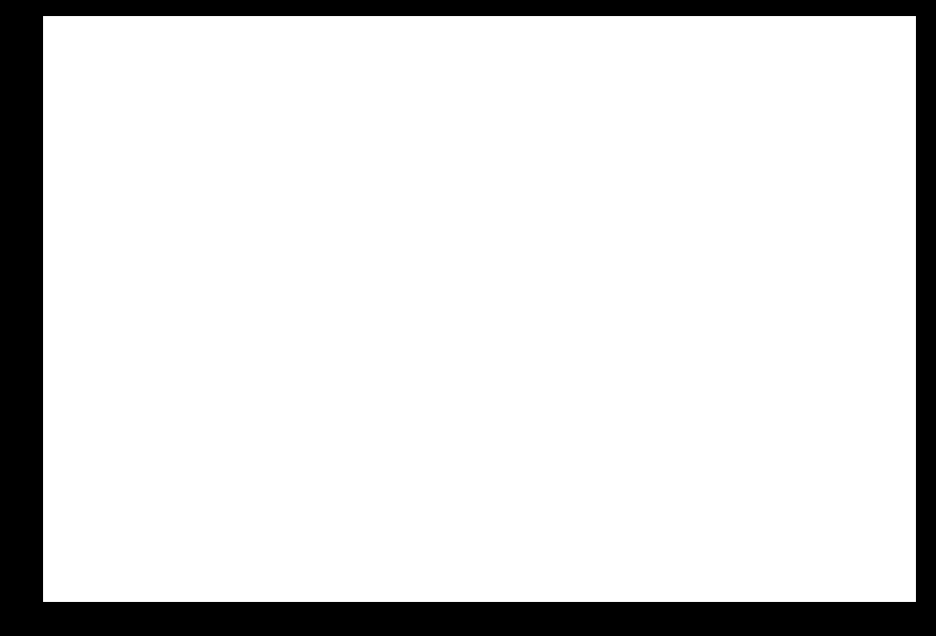

In [25]:
fig, ax = plt.subplots( figsize=(10,7), facecolor=(0, 0, 0))
fig.tight_layout(pad=3.0)


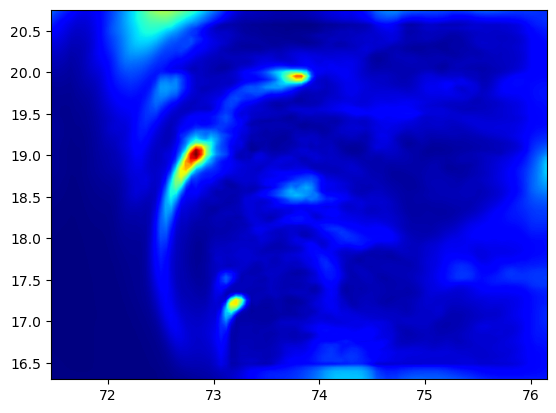

In [31]:
plt.contourf(abc.XLONG[0, 0, :].values, abc.XLAT[0, :, 0].values, abc.no2.sel(Time=1, bottom_top=0), levels=1000, cmap=cm.jet)


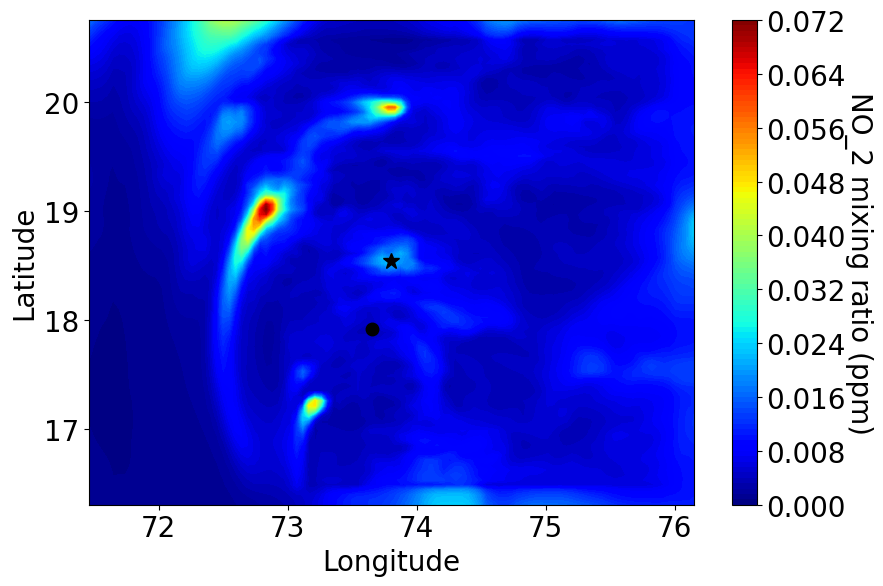

In [36]:
fig, ax = plt.subplots(figsize=(10,7), facecolor=(1, 1, 1))
fig.tight_layout(pad=3.0)


    # Set general font size
plt.rcParams['font.size'] = '20'

cs = ax.contourf(abc.XLONG[0, 0, :].values, abc.XLAT[0, :, 0].values, abc.no2.sel(Time=1, bottom_top=0), levels=100, cmap=cm.jet)
cbar = fig.colorbar(cs)
cbar.set_label('NO_2 mixing ratio (ppm)', rotation=270, labelpad=20)

plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

plt.plot(73.804, 18.542, marker="*", markersize=12, markeredgecolor="black", markerfacecolor="black")

plt.plot(73.65, 17.92, marker="o", markersize=9, markeredgecolor="black", markerfacecolor="black")

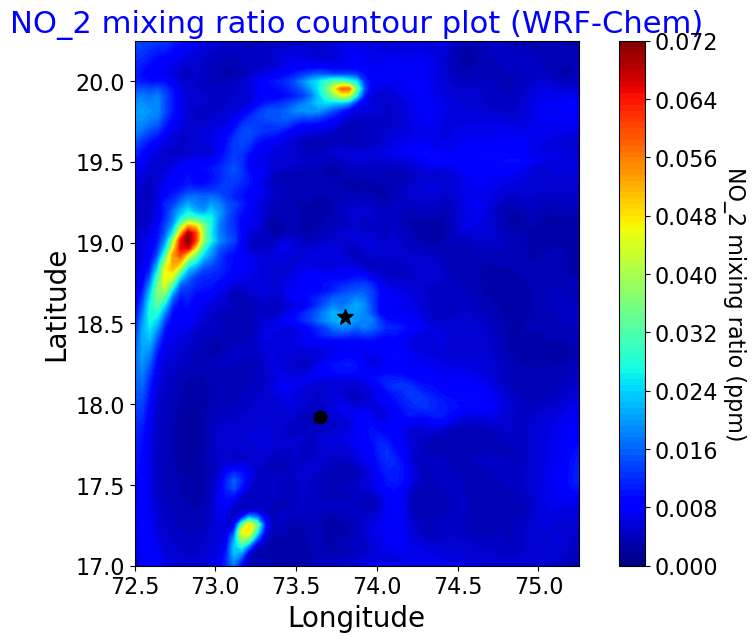

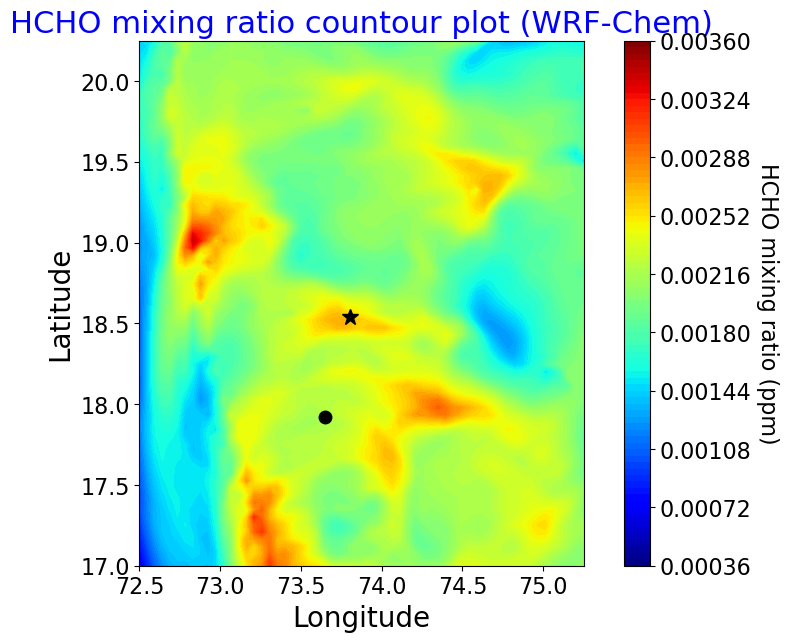

In [38]:
fig, ax = plt.subplots(figsize=(10,7), facecolor=(1, 1, 1))
fig.tight_layout(pad=3.0)


    # Set general font size
plt.rcParams['font.size'] = '16'

cs = ax.contourf(abc.XLONG[0, 0, :].values, abc.XLAT[0, :, 0].values, abc.no2.sel(Time=1, bottom_top=0), levels=100, cmap=cm.jet)
cbar = fig.colorbar(cs)
cbar.set_label('NO_2 mixing ratio (ppm)', rotation= 270, labelpad=20)

plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

plt.plot(73.804, 18.542, marker="*", markersize=12, markeredgecolor="black", markerfacecolor="black")

plt.plot(73.65, 17.92, marker="o", markersize=9, markeredgecolor="black", markerfacecolor="black")


# m = Basemap()
# # draw coastlines.
# m.drawcoastlines()


ax.set(aspect = 1,
       xlim =(72.5, 75.25),
       xticks=([ 72.5, 73, 73.5, 74, 74.5, 75]),
       ylim =(17, 20.25),
       yticks = ([ 17, 17.5, 18, 18.5, 19, 19.5, 20]))

# # displaying the title

titlename = 'NO_2 mixing ratio countour plot (WRF-Chem)'       

plt.title(label=titlename,
          fontsize=22,
          color="blue")


savefilename = 'NO_2_mixing_ratio_contour_WRF_Chem.png'


plt.savefig(savefilename)


fig, ax = plt.subplots(figsize=(10,7), facecolor=(1, 1, 1))
fig.tight_layout(pad=3.0)


    # Set general font size
plt.rcParams['font.size'] = '16'

cs = ax.contourf(abc.XLONG[0, 0, :].values, abc.XLAT[0, :, 0].values, abc.hcho.sel(Time=1, bottom_top=0), levels=100, cmap=cm.jet)
cbar = fig.colorbar(cs)
cbar.set_label('HCHO mixing ratio (ppm)', rotation= 270, labelpad=20)

plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

plt.plot(73.804, 18.542, marker="*", markersize=12, markeredgecolor="black", markerfacecolor="black")

plt.plot(73.65, 17.92, marker="o", markersize=9, markeredgecolor="black", markerfacecolor="black")



ax.set(aspect = 1,
       xlim =(72.5, 75.25),
       xticks=([ 72.5, 73, 73.5, 74, 74.5, 75]),
       ylim =(17, 20.25),
       yticks = ([ 17, 17.5, 18, 18.5, 19, 19.5, 20]))

# # displaying the title

titlename = 'HCHO mixing ratio countour plot (WRF-Chem)'       

plt.title(label=titlename,
          fontsize=22,
          color="blue")


savefilename = 'HCHO_mixing_ratio_contour_WRF_Chem.png'


plt.savefig(savefilename)


In [39]:
abc.bottom_top

<xarray.DataArray 'bottom_top' (bottom_top: 49)> Size: 392B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
Dimensions without coordinates: bottom_top

In [40]:
abc.south_north

<xarray.DataArray 'south_north' (south_north: 100)> Size: 800B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
Dimensions without coordinates: south_north

In [6]:
abc.Time

<xarray.DataArray 'Time' (Time: 24)> Size: 192B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])
Coordinates:
    XTIME    (Time) datetime64[ns] 192B ...
Dimensions without coordinates: Time

In [7]:
abc.bottom_top

<xarray.DataArray 'bottom_top' (bottom_top: 49)> Size: 392B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
Dimensions without coordinates: bottom_top

In [12]:
abc.XLAT[0, :, 0]

<xarray.DataArray 'XLAT' (south_north: 100)> Size: 400B
array([16.30182 , 16.347351, 16.39286 , 16.438356, 16.483852, 16.529335,
       16.574802, 16.620258, 16.665712, 16.711147, 16.756575, 16.801989,
       16.847395, 16.89279 , 16.93817 , 16.983541, 17.028908, 17.074253,
       17.1196  , 17.164917, 17.210236, 17.255547, 17.300838, 17.34613 ,
       17.3914  , 17.436657, 17.481907, 17.52715 , 17.572372, 17.617588,
       17.662798, 17.707987, 17.753174, 17.798342, 17.843504, 17.88865 ,
       17.933784, 17.978912, 18.024025, 18.069126, 18.114218, 18.159298,
       18.204363, 18.249422, 18.294468, 18.33949 , 18.384516, 18.42952 ,
       18.474518, 18.519508, 18.564478, 18.609442, 18.65439 , 18.699326,
       18.74425 , 18.789164, 18.834066, 18.878954, 18.923834, 18.968702,
       19.013556, 19.058395, 19.103222, 19.148043, 19.192848, 19.23764 ,
       19.28242 , 19.327185, 19.371943, 19.416687, 19.461418, 19.506136,
       19.550846, 19.595543, 19.640219, 19.684889, 19.729544, 19.774193,
       19.81882 , 19.863451, 19.90805 , 19.952646, 19.997232, 20.041794,
       20.086353, 20.1309  , 20.175432, 20.219946, 20.26445 , 20.308949,
       20.353428, 20.397892, 20.44235 , 20.486794, 20.531218, 20.575634,
       20.620037, 20.664427, 20.708801, 20.753172], dtype=float32)
Coordinates:
    XLAT     (south_north) float32 400B 16.3 16.35 16.39 ... 20.66 20.71 20.75
    XLONG    (south_north) float32 400B 71.46 71.46 71.46 ... 71.46 71.46 71.46
    XTIME    datetime64[ns] 8B ...
Dimensions without coordinates: south_north
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:

In [15]:
abc.XLONG[0, 0, :].values

array([71.45595 , 71.50338 , 71.55082 , 71.59825 , 71.64568 , 71.69312 ,
       71.740555, 71.787994, 71.83543 , 71.882866, 71.9303  , 71.97774 ,
       72.02517 , 72.07261 , 72.12004 , 72.16748 , 72.21491 , 72.262344,
       72.309784, 72.357216, 72.404655, 72.45209 , 72.49953 , 72.54696 ,
       72.5944  , 72.64183 , 72.68927 , 72.7367  , 72.78414 , 72.83157 ,
       72.879005, 72.926445, 72.97388 , 73.02132 , 73.06875 , 73.11619 ,
       73.16362 , 73.21106 , 73.25849 , 73.30593 , 73.35336 , 73.4008  ,
       73.448235, 73.49567 , 73.543106, 73.59054 , 73.63798 , 73.68541 ,
       73.73285 , 73.78028 , 73.82772 , 73.87515 , 73.92259 , 73.970024,
       74.01746 , 74.064896, 74.112335, 74.15977 , 74.2072  , 74.25464 ,
       74.30207 , 74.34951 , 74.39694 , 74.44438 , 74.49181 , 74.53925 ,
       74.586685, 74.634125, 74.68156 , 74.729   , 74.77643 , 74.82386 ,
       74.8713  , 74.91873 , 74.96617 , 75.0136  , 75.06104 , 75.108475,
       75.155914, 75.20335 , 75.250786, 75.29822 , 

In [ ]:
!conda install conda-forge::basemap

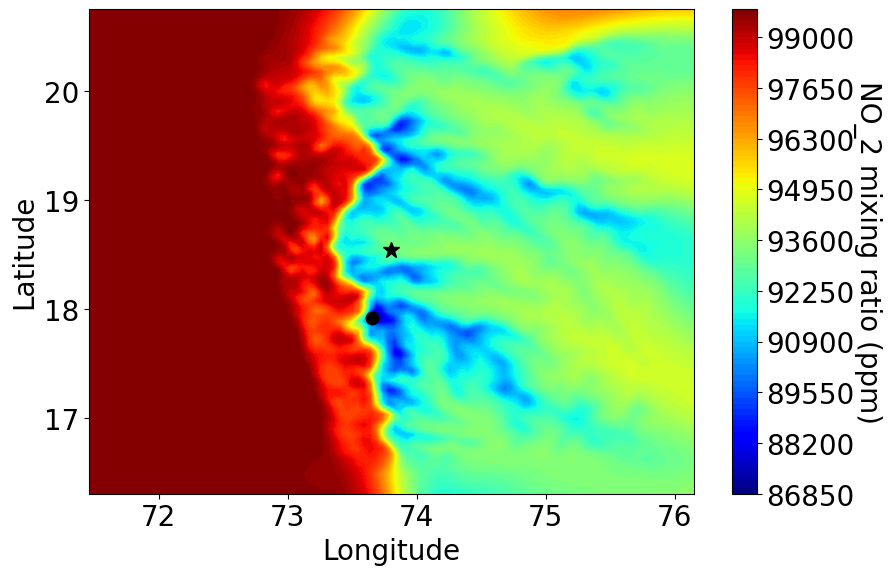

In [13]:
fig, ax = plt.subplots(figsize=(10,7), facecolor=(1, 1, 1))
fig.tight_layout(pad=3.0)


    # Set general font size
plt.rcParams['font.size'] = '20'

cs = ax.contourf(abc.XLONG[0, 0, :].values, abc.XLAT[0, :, 0].values, abc.PB.sel(Time=1, bottom_top=0), levels=100, cmap=cm.jet)
cbar = fig.colorbar(cs)
cbar.set_label('NO_2 mixing ratio (ppm)', rotation=270, labelpad=20)

plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

plt.plot(73.804, 18.542, marker="*", markersize=12, markeredgecolor="black", markerfacecolor="black")

plt.plot(73.65, 17.92, marker="o", markersize=9, markeredgecolor="black", markerfacecolor="black")